In [1]:
%pylab inline
from sklearn import datasets
figsize(10,10)

Populating the interactive namespace from numpy and matplotlib


**1 One dimensional first example**

**1**

$x_{k+1} = x_k - \alpha \nabla f(x_k)$ with $f(x) = x^2 - \frac{x^4}{4}$ and $\nabla f(x_k) = 2 x_k - x_k^3$ so that $x_{k+1} = x_k - 2 \alpha x_k + \alpha x_k^3$.

We can define $g_{\alpha}(x)$ = $x - 2 \alpha x + \alpha x^3$ = $x (1 - 2 \alpha + \alpha x^2)$ such that $x_{k+1}$ = $g_{\alpha}(x_k)$.

Seeking for the limit of $(x_k)_k$ we look for the fixed points of $g_{\alpha}(x_k)$ :
$x_k = x_k (1 - 2 \alpha + \alpha x_k^2) \iff$ $x_k = -\sqrt{2}$, $x_k = 0$ or $x_k = \sqrt{2}$.

Studying $g_{\alpha}(x_k) - x_k$ we have :

- for $x_0 \in (-\infty, -\sqrt{2}) : g_{\alpha}(x_k) - x_k < 0 \implies x_k \searrow \implies x_k \longrightarrow -\infty$,

- for $x_0 \in (-\sqrt{2}, 0) : g_{\alpha}(x_k) - x_k > 0 \implies x_k \nearrow \implies x_k \longrightarrow 0$,

- for $x_0 \in (0, \sqrt{2}) : g_{\alpha}(x_k) - x_k < 0 \implies x_k \searrow \implies x_k \longrightarrow 0$,

- for $x_0 \in (\sqrt{2}, \infty) : g_{\alpha}(x_k) - x_k > 0 \implies x_k \nearrow \implies x_k \longrightarrow +\infty$.

**2** & **3**

We consider a constant step-size : $\alpha \in (0,1)$ and look at cases in which the sequence converges.

For $x_0 \in (-\sqrt{2}, 0)$ : 

$\underset{k \rightarrow \infty}{lim} \frac{|x_{k+1} - 0|}{|x_k - 0|} = |1 - 2 \alpha| $.

The rate of convergence of the method is given by $1 - 2 \alpha$ (since $\alpha$ is positive). This is a linear (or geometric) rate of convergence for $1- 2 \alpha \in (0,1) \iff \alpha \in (0,\frac{1}{2})$.

When $\alpha = \frac{1}{2}$ the rate of convergence is 0 (superlinear rate of convergence). 

The same reasoning apply for $x_0 \in (0, \sqrt{2})$.

In [2]:
def f1(x):
    return x**2 - (x**4)/4

def df1(x):
        return 2*x - x**3

def behavior(alpha, x0, df):
    
    x = x0
    list = [abs(x)]
    for n in range(100):
        x = x - alpha*(df(x))
        list.append(abs(x))

    semilogy(list)

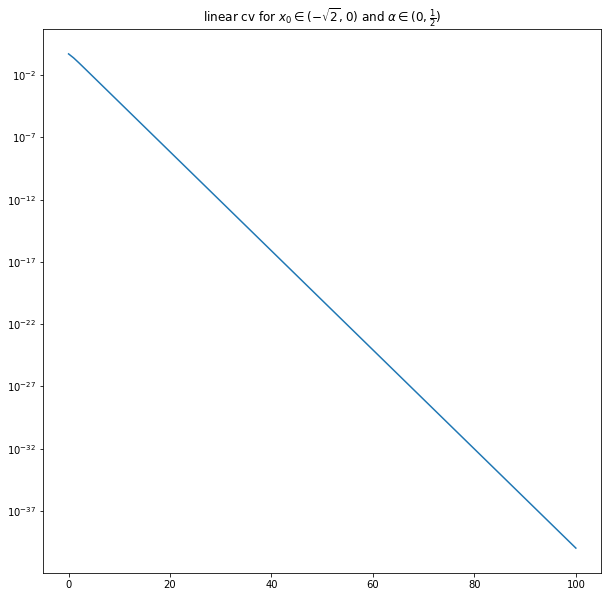

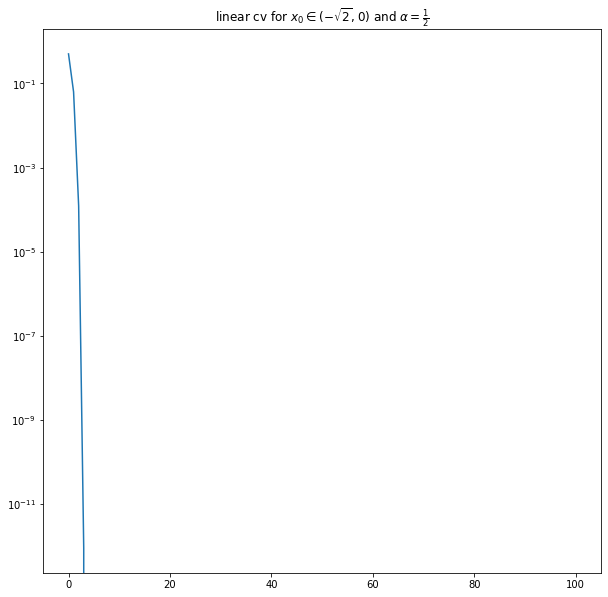

In [3]:
plt.title("linear cv for $x_0 \\in (-\\sqrt{2}, 0)$ and $\\alpha \\in (0,\\frac{1}{2})$")
behavior(0.3, -0.5, df1)
show()

plt.title("linear cv for $x_0 \\in (-\sqrt{2}, 0)$ and $\\alpha = \\frac{1}{2}$")
behavior(0.5, -0.5, df1)
show()

### **1.2 One dimensional 2nd example**

**1**, **2** & **3**

$f(x) = \frac{x^2}{1 + x^2}$

$Df(x) = \frac{2x}{(1 + x^2)^2}$

$D^2f(x) = \frac{-6x^4 - 4x^2 + 2}{(1 + x^2)^4}$

convex function $\iff D^2f(x) \geq 0$

strongly convex function $\iff D^2f(x) \geq \alpha Id$ where $\alpha >0$

$C^1_L$ function $\iff$ continuous and lipschitz gradient$

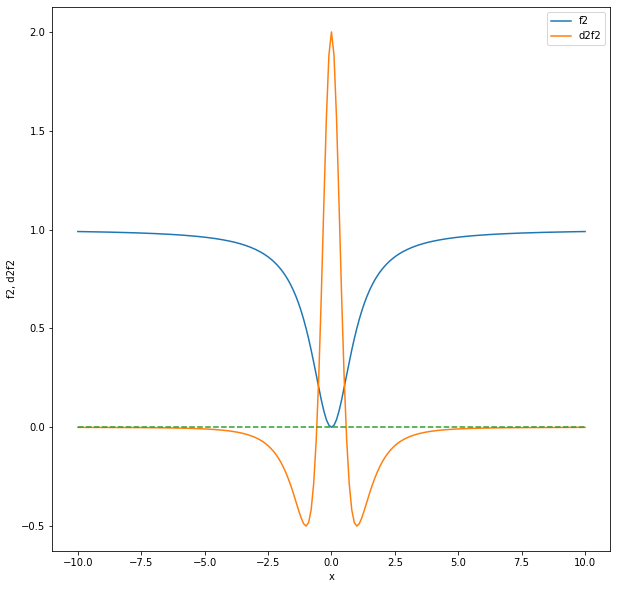

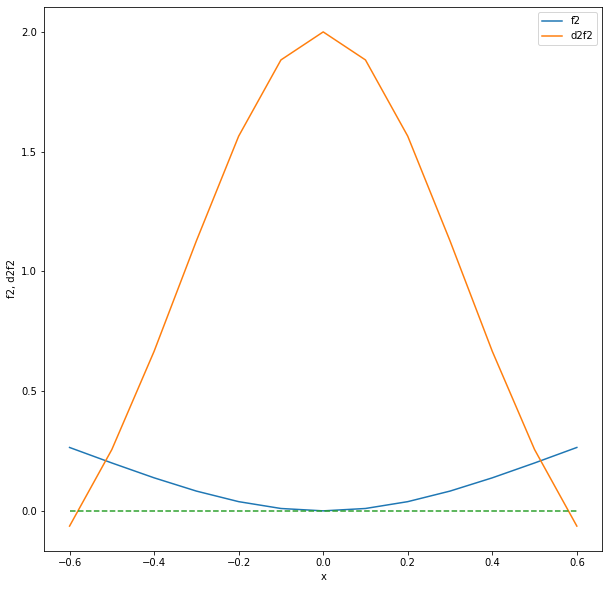

In [4]:
def f2(x):
    return x**2 / (1 + x**2)

def df2(x):
    return 2*x / (1 + x**2)**2

def d2f2(x):
        return (2 - 4*x**2 - 6*x**4) / (1 + x**2)**4
    
x = arange(-10, 10.1, 0.1)

plot(x,f2(x))
plot(x,d2f2(x))
plot(x, 0*x, "--")
xlabel("x")
ylabel("f2, d2f2")
legend(("f2","d2f2"))
show()

x = arange(-0.6, 0.7, 0.1)

plot(x,f2(x))
plot(x,d2f2(x))
plot(x, 0*x, "--")
xlabel("x")
ylabel("f2, d2f2")
legend(("f2","d2f2"))
show()

f is not convex on $\mathbb{R}$, indeed the $2^{nd}$ derivative of f is not aways positive.

f is not strongly convex on $\mathbb{R}$, indeed the $2^{nd}$ derivative is not bounded from below by a positive element $\alpha$.

f is $C^1_L$ : it is clear that f is $C^1(\mathbb{R})$, moreover $D^2f$ is bounded by 2 $\iff$ $Df$ is lipschitz, so that $Df$ is continuous and lipschitz $\iff$ f is $C^1_L$. 

We can look at a special interval where f is $C^1_L$ convex and strongly convex. 

On $[-0.5, 0.5]$ f has these good properties (see graphic above : f is $C^1_L$ convex and strongly convex).

Is this interval stable ?

Let's seek for the fixed points of f :

$x_{k+1} = x_k - \alpha \nabla f(x_k)$ with $f(x) = \frac{x^2}{1 + x^2}$ and $\nabla f(x_k) = \frac{2x}{(1 + x^2)^2} $ so that $x_{k+1} = x_k - \frac{2 \alpha x_k}{(1 + x_k^2)^2} $.

We can define $g_{\alpha}(x)$ = $x - \frac{2 \alpha x}{(1 + x^2)^2}$ such that $x_{k+1}$ = $g_{\alpha}(x_k)$.

Seeking for the limit of $(x_k)_k$ we look for the fixed points of $g_{\alpha}(x_k)$ :
$x_k = x_k - \frac{2 \alpha x_k}{(1 + x_k^2)^2} \iff$ $x_k = 0$.

Studying $g_{\alpha}(x_k) - x_k$ we have :

- for $x_k \in (-0.5, 0) : g_{\alpha}(x_k) - x_k > 0 \implies x_k \nearrow \implies x_k \longrightarrow 0$

- for $x_k \in (0, 0.5) : g_{\alpha}(x_k) - x_k < 0 \implies x_k \searrow x_k \longrightarrow 0$

Therefore the interval [-0.5, 0.5] is stable.

$\underset{k \rightarrow \infty}{lim} \frac{|x_{k+1} - 0|}{|x_k - 0|} = |1 - 2 \alpha| $.

The rate of convergence of the method is given by $1 - 2 \alpha$ (since $\alpha$ is positive). This is a linear (or geometric) rate of convergence for $1- 2 \alpha \in (0,1) \iff \alpha \in (0,\frac{1}{2})$.

When $\alpha = \frac{1}{2}$ the rate of convergence is 0 (superlinear rate of convergence). 

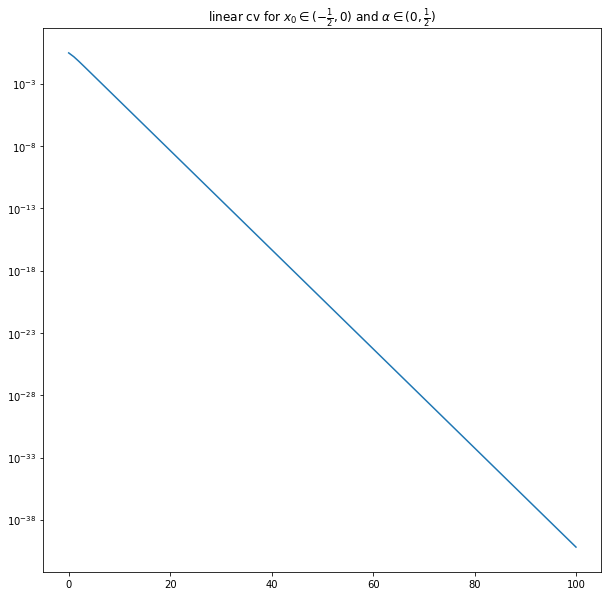

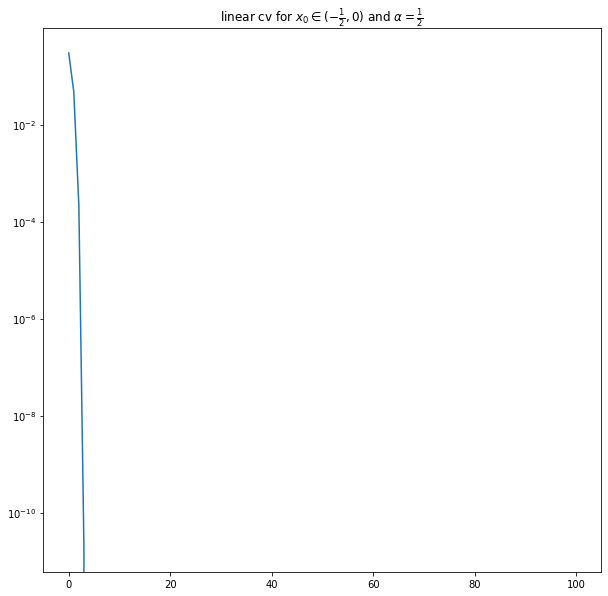

In [5]:
plt.title("linear cv for $x_0 \\in (-\\frac{1}{2}, 0)$ and $\\alpha \\in (0,\\frac{1}{2})$")
behavior(0.3, -0.3, df2)
show()

plt.title("linear cv for $x_0 \\in (-\\frac{1}{2}, 0)$ and $\\alpha = \\frac{1}{2}$")
behavior(0.5, -0.3, df2)
show()

**2 Two dimensional examples**

**2.1 Baseline code**

In [6]:
def gradientApprox(f, x, eps=10**(-7)):
    
    """ Here we approximate the derivative of f at each coordinate in the array x.
        The function return the array of the value of the different derivatives evaluated 
        at each value of the array x."""
    
    if type(x)!=numpy.ndarray:
        x = array(x)

    gradient = zeros(x.shape)
    
    for i in range(x.shape[0]):
        
        vect_eps = zeros(x.shape)
        np.put(vect_eps,i,eps)
        gradient[i] = ( f(x+vect_eps)-f(x) ) / eps
    
    return gradient

def methodNormeGrad(f, X0, alpha, tol, N=2000):
    
    """ The purpose is to estimate the extrema point X of the function f.
    
        1rst we initialize the gradient for the initial values in array X0,
        and we initialize the value of the estimated extrema point X with initial values X0.
        
        2nd we enter a loop until the gradients converges in norm to 0 
        (or until the max number of iterations is reached).
        
        In this loop, we update the estimated point by substracting a deviation from the previous gradient
        making the gradient smaller.
        Then we update the gradient and each time we save its norm in the array lnormg so that we are 
        able in the end to see the convergence of the norm to 0. 
        
        The function return the estimated extrema point and the array of norms."""
    
    X = X0
    g = gradientApprox(f,X0)
    lnormeg = [norm(g)]
    
    n=0
    
    while norm(g) > tol and n < N:
        
        X = X - alpha*g
        g = gradientApprox(f,X)
        lnormeg.append(norm(g))
        n += 1
        
    if n==N:
        
        print(f"Max number of iterations {N}")
        
    return X, array(lnormeg)


def methodePasFixe(f, X0, alpha, tol, N=2000):
    
    """ Same function as before except that instead of saving the norm of the gradient each time,
        here we save the new coordinates. 
        
        The function return the array of successive estimated points converging toward the extrema. """
    
    lX=[X0]
    X=X0
    g=gradientApprox(f,X0)

    n=0
    
    while norm(g) > tol and n < N:
        
        X = X - alpha*g
        g = gradientApprox(f,X)
        lX.append(X)
        n += 1
        
    if n==N:
        
        print(f"Max number of iterations {N}")
    
    return array(lX)

**2.2 first example**

**1** & **2**

Consider 

$g(x,y) = (x + y - 1)^2 + (x -2y)^2 + (2x - 4y + 3)^2$

$Dg(x,y) = \begin{pmatrix}12x - 18y + 10\\ 42y - 18x - 26\end{pmatrix}$

$D^2g(x,y) = 
\begin{pmatrix}
12&-18\\
-18&42\\
\end{pmatrix}$

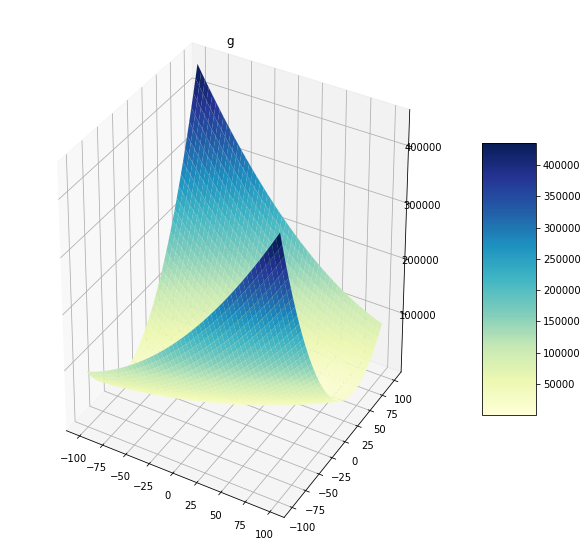

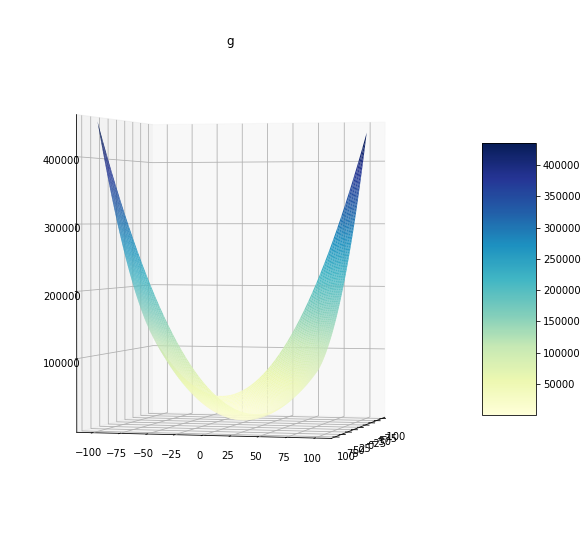

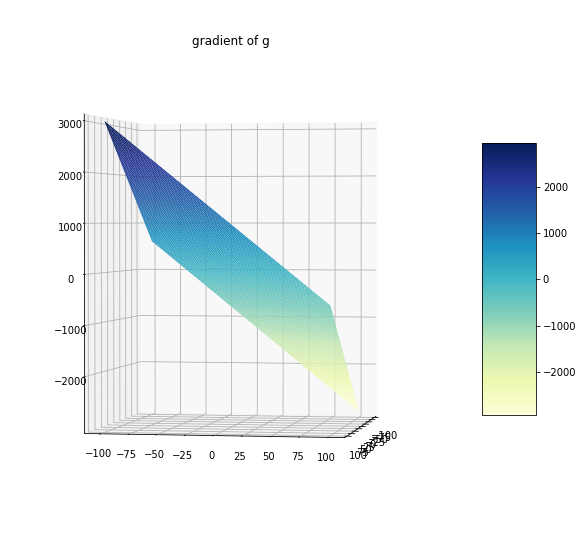

In [7]:
def g(X):
    return (X[0] + X[1] - 1)**2 + (X[0] - 2*X[1])**2 + (2*X[0] - 4*X[1] + 3)**2

X = np.arange(-100, 100, 0.25)
Y = np.arange(-100, 100, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X,Y])

fig = plt.figure()
ax = fig.gca(projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap="YlGnBu")
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.title("g")
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=1, azim=15)
surface = ax.plot_surface(X, Y, Z, cmap="YlGnBu")
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.title("g")
plt.show()

def dg(X):
    return array([12*X[0] - 18*X[1] + 10, 42*X[1] - 18*X[0] - 26])

X = np.arange(-100, 100, 0.25)
Y = np.arange(-100, 100, 0.25)
X, Y = np.meshgrid(X, Y)
Z = dg([X,Y])[0]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=1, azim=10)
surface = ax.plot_surface(X, Y, Z, cmap="YlGnBu")
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.title("gradient of g")
plt.show()

$D^2g(x,y)$ is a 2x2 matrix with Det = 180 > 0 and Tr = 54 > 0. Therefore $D^2g(x,y)$ is positive which implies that g is convex.

$D^2g(x,y)$ is bounded since each entry is constant so that $Dg$ is lipschitz. Moreover $Dg$ is bilinear so continuous, hence g is $C^1_L$.

Is g strongly convex ?

$\exists$ $\alpha > 0$ such that $D^2g(x,y) \geq \alpha Id$ ? 

$\iff$ $\exists$ $\alpha > 0$ such that $\begin{pmatrix} 12&-18\\ -18&42\\ \end{pmatrix} \geq \begin{pmatrix} \alpha&0\\ 0&\alpha \\ \end{pmatrix}$ ?

$\iff$ $\exists$ $\alpha > 0$ such that $(12 - \alpha) x^2 + (42 - \alpha) y^2 - 36 xy > 0$ ?

To find the good step size we need to find the bigger $\alpha$ such that g is $\alpha$ strongly convex. Then by theorem  1.6.1 from the lecture notes the stepsize $\frac{2}{L + \alpha}$ applied on the L smooth function g.

**3**

g is convex so we can seek for the minimizer by equalizing the gradient to 0.

$Dg(x,y) = \begin{pmatrix} 12x - 18y + 10\\ 42y - 18x - 26\end{pmatrix} = \begin{pmatrix}0\\ 0\end{pmatrix}$ 

$\iff x = \frac{18y - 10}{12}$ and $y(42 - \frac{18^2}{12}) + \frac{180}{12} - 26 = 0$

$\iff x = \frac{4}{15}$ and $y = \frac{11}{15}$

**4**

(-5.0, 5.0, -5.0, 5.0)

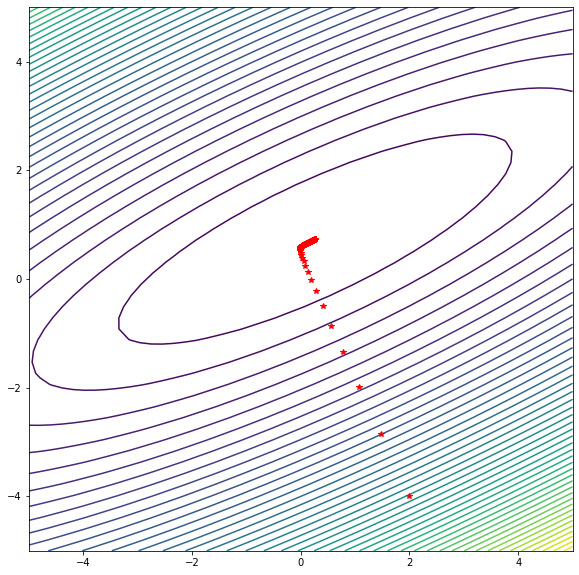

In [8]:
X=linspace(-5,5)
Y=linspace(-5,5)

Z = array( [ [g(array([x,y])) for x in X] for y in Y ] )

contour(X, Y, Z, 50)

extrema_convergence = methodePasFixe(g, [2,-4], 0.005, 10**(-8))

coord_x = [X[0] for X in extrema_convergence]
coord_y = [X[1] for X in extrema_convergence]

plot(coord_x,coord_y,"r*")

axis("scaled")

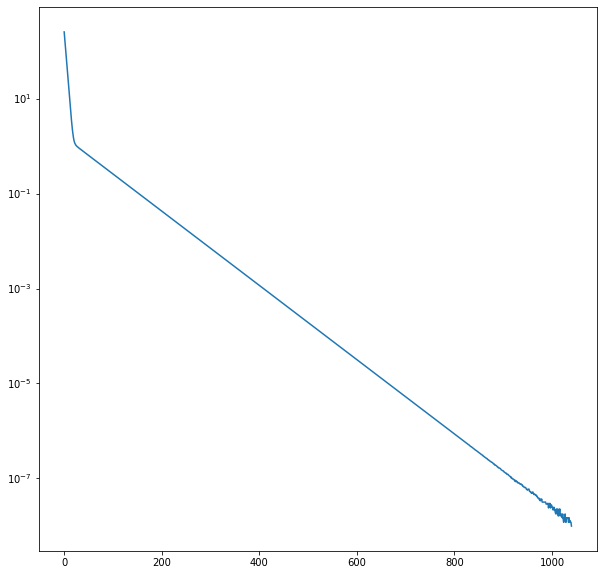

In [9]:
extrema_convergence, norms_list = methodNormeGrad(g, [2,-4], 0.005, 10**(-8))

semilogy(norms_list)

The behavior of the gradient descent method is illustrated by its linear rate (indeed semilogy plot a straight line curve).

**2.3 second example**

**1**

Consider 

$g_2(x,y) = 1 - \frac{1}{1+ax^2 + y^2}$

$Dg_2(x,y) = \begin{pmatrix} \frac{2ax}{(1 + ax^2 + y^2)^2}\\ \frac{2y}{(1 + ax^2 + y^2)^2} \end{pmatrix}$

$D^2g_2(x,y) = 
\begin{pmatrix}
\frac{-6 a^3 x^4 - 4 a^2 x^2 - 4 a^2 x^2 y^2 + 6 a y^2 + 2 a}{(1 + ax^2 + y^2)^4} & \frac{-8 a x y^3 - 8 a x y - 8 a^2x^3 y}{(1 + ax^2 + y^2)^4}\\
\frac{-8 a x y^3 - 8 a x y - 8 a^2x^3 y}{(1 + ax^2 + y^2)^4} & \frac{2 a^2 x^4 + 4 a x^2 - 4 a x^2 y^2 - 6 y^4 - 4 y^2 + 2}{(1 + ax^2 + y^2)^4}\\
\end{pmatrix}$

$argmin$ $g$ is (0,0) and $||D^2g_2(x,y)|| \leq ||D^2g_2(0,0)||$.

$D^2g_2(0,0) = \begin{pmatrix} 2a & 0\\ 0 & 2\\ \end{pmatrix}$ so $||D^2g_2(0,0)|| = \begin{Vmatrix} 2a & 0\\ 0 & 2\\ \end{Vmatrix} = max$ among the eigenvalues of the matrix $= max\{2a,2\}$.

$Dg_2$ is continuous with respect to each coordinates, $D^2g_2(x,y)$ is bounded by $L = max\{2a,2\}$ so that $Dg_2$ is L lipschitz and thus $g_2$ is $C^1_L$. 

**2**

By theorem 1.6.1 the good stepsize to choose is $\frac{2}{L + \alpha}$ for a $\alpha$ strongly convex and $C^1_L$ function.

$\alpha$ is such that $D^2g_2(x,y) \geq \alpha Id$ $\iff$ $\alpha$ is a lower bound of the hessian $\iff$ $\alpha$ is the smallest eigenvalue of the hessian at the point of minimum 

$\iff$ $\alpha = min\{2a,2\}$.

L is such that $Dg_2$ is L lipschitz $\iff$ L is an upper bound of the hessian $\iff$ L is the biggest eigenvalue of the hessian at the point of minimum 

$\iff$ L $= max\{2a,2\}$.

Therfore, for a $\in (0,1)$ : L = 2, $\alpha$ = 2a

for a > 1 : L = 2a, $\alpha$ = 2

Then whatever a is, L + $\alpha$ = 2a + 2 and the stepsize $\gamma$ should be $\frac{2}{2a + 2} = \frac{1}{1 + a}$.

**Why is it an optimal stepsize ?**

The convergence is linear, then we look at the rate of convergence :

$\underset{k \rightarrow \infty}{lim} \frac{|\begin{pmatrix} x_{k+1}\\ y_{k+1} \end{pmatrix} - \begin{pmatrix} 0\\ 0 \end{pmatrix}|}{|\begin{pmatrix} x_{k}\\ y_{k} \end{pmatrix} - \begin{pmatrix} 0\\ 0 \end{pmatrix}|} =  \underset{k \rightarrow \infty}{lim} \frac{|\begin{pmatrix} x_{k}\\ y_{k} \end{pmatrix} - \gamma \begin{pmatrix} \frac{2ax_k}{(1 + ax_k^2 + y_k^2)^2}\\ \frac{2y_k}{(1 + ax_k^2 + y_k^2)^2} \end{pmatrix}|}{|\begin{pmatrix} x_{k}\\ y_{k} \end{pmatrix}|} = |\begin{pmatrix} 1\\ 1 \end{pmatrix} - \gamma \begin{pmatrix} 2a\\ 2 \end{pmatrix}|$

So the rate of convergence of the method is given by $max\{|1 - 2 a \gamma|,|1 - 2 \gamma|\}$.

By representing graphically the functions : 
- $|1 - 2 a \gamma|$ for a $\in (0,1)$
- $|1 - 2 a \gamma|$ for a > 1
- $|1 - 2 \gamma|$

We can see that :
- for a $\in (0,1)$ the maximum function has its minimum at the intersection of : $1 - 2 a \gamma$ & $2 \gamma - 1$
- for a > 1 the maximum function has its minimum at the intersection of : $1 - 2 \gamma$ & $2 a \gamma - 1$

In both cases, it is equivalent to say that the maximum function has its minimum at $\gamma^* = \frac{1}{1 + a}$, in other words, the rate of convergence is minimized for $\gamma^*$.

Hence the stepsize $\frac{1}{1 + a}$ is optimal since it minimizes the rate of convergence of the method.

**3**

In [10]:
def f(X):
    return 1 - 1/( 1 + a*X[0]**2 + X[1]**2 )

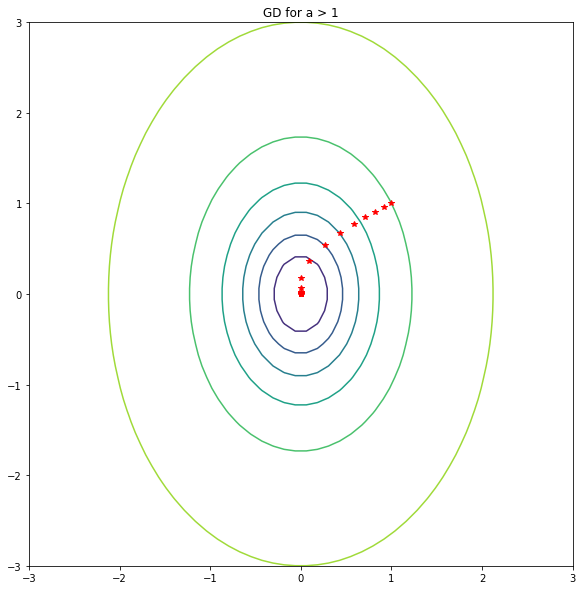

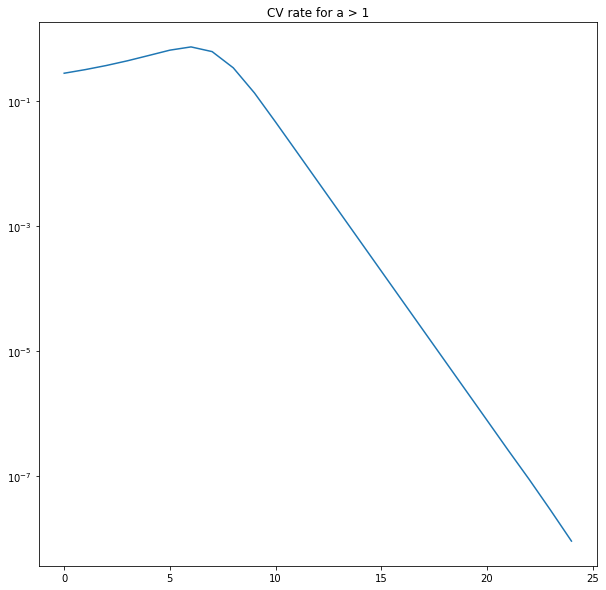

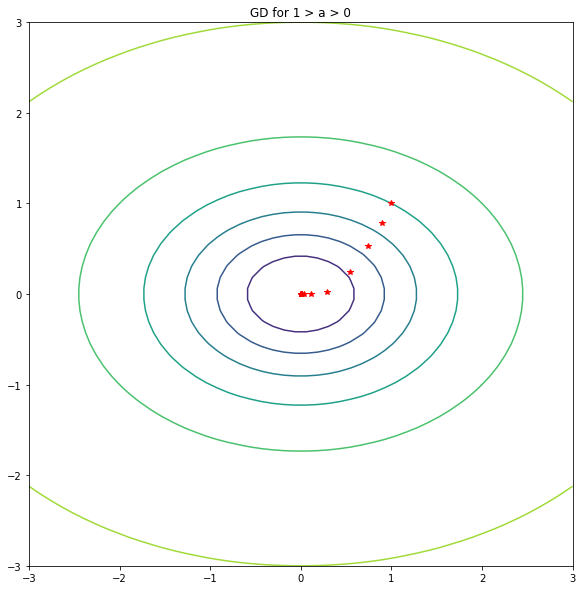

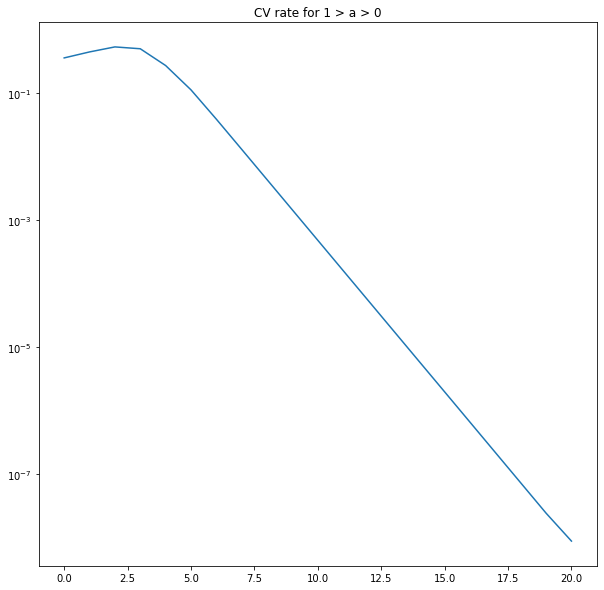

In [11]:
a = 2

X=linspace(-3,3)
Y=linspace(-3,3)

Z = array( [ [f(array([x,y])) for x in X] for y in Y ] )

contour(X, Y, Z)

extrema_convergence = methodePasFixe(f, [1,1], 1/(1+a), 10**(-8))

coord_x = [X[0] for X in extrema_convergence]
coord_y = [X[1] for X in extrema_convergence]

plot(coord_x,coord_y,"r*")
title("GD for a > 1")
axis("scaled")
show()

extrema_convergence, norms_list = methodNormeGrad(f, [1,1], 1/(1+a), 10**(-8))
title("CV rate for a > 1")
semilogy(norms_list)
show()

a = 0.5

X=linspace(-3,3)
Y=linspace(-3,3)

Z = array( [ [f(array([x,y])) for x in X] for y in Y ] )

contour(X, Y, Z)

extrema_convergence = methodePasFixe(f, [1,1], 1/(1+a), 10**(-8))
coord_x = [X[0] for X in extrema_convergence]
coord_y = [X[1] for X in extrema_convergence]

plot(coord_x,coord_y,"r*")
title("GD for 1 > a > 0")
axis("scaled")
show()

extrema_convergence, norms_list = methodNormeGrad(f, [1,1], 1/(1+a), 10**(-8))
title("CV rate for 1 > a > 0")
semilogy(norms_list)
show()

**4**

The gradient descent approximation has already be done using the difference values method since we use "gradientapprox" function.

**5** see **3**

**6** see **3**

**3 Looking for a perfect billard trajectory**

**1**

L represents the length of the trajectory which successively join the point $t_k$ for k = 0, ..., n-1.

**2**

Let's consider $(t_k)_k$ such that $\forall 1 \leq k \leq n-1$, $t_k \in R$.

$sin(.)$ and $cos(.)$ are continuous on $R$ so that $\forall k$, $\gamma(t_k)$ in continuous from $R$ to $R^2$.

$||.||$ is continuous on $R$ so by composition of continuous functions L is continuous from $R^n$ to $R$.

Then we get that L is continuous on $[0, 2\pi]^n$ which is a compact set. Therefore L attains its bounds and so L has a maximum on $[0, 2\pi]^n$. Moreover, by periodicity of $sin(.)$ and $cos(.)$ and so of $\gamma$ and of L : the maximum is also a maximum on $R^n$ and so a global maximum.


A **perfect billard trajectory** is the trajectory between n points located on the boundary of a convex set such that :

**the angle between the previous segment and the tangent at the boundary = the angle between the tangent at the boundary and the next segment**

Moreover, we want that the trajectory is closed (last point and first one are joined).

Then if the convex is an ellipse the points should be defined by the $\gamma$ function of the TP which is a 2$\pi$-periodic parametrization of the boundary, and then the length of the trajectory which successively join these points can be maximized. **The maximizer** of this L function produces a **perfect billard trajectory**.

**3**

epsilon=1e-8

def gradientApprox(f,x):
    
    fx=f(x)
    gra=zeros(size(x))
    
    for i in range(size(x)):
        veps=zeros(size(x))
        veps[i]+=epsilon
        gra[i]=(f(x+veps)-fx)/epsilon
        
    return gra

This function is the same as presented in part **2.1 Baseline code**.

The function take 2 arguments : a function f and a vector x.

For each coordinate $x_i$ of x the function approximate the derivative of f evaluated at the coordinate $x_i$ by the formula :

$\epsilon > 0$, $\frac{df}{dx_i} = \underset{\epsilon \rightarrow 0} \lim$ $\frac{f(x_i + \epsilon) - f(x_i)}{\epsilon}$

Then the gradient returned by the function is the vector of values of the different derivatives evaluated at each value of the array x.

**4**

In [12]:
A = 1
B = 2

# A = B = 2 gives a perfect star shape of the trajectory

def gamma(t):
    """Compute the gamma function of the TP : useful to draw the ellipse later."""
    return array([A*cos(t),B*sin(t)])

def moinsL(vt):
    """Compute -L where L is the function presented previously."""
    n = len(vt)
    return - norm( gamma(vt[n-1])-gamma(vt[0]) ) - sum( [ norm( gamma(vt[i])-gamma(vt[i-1]) ) for i in range(1,n) ] )

**5** see **2.1 Baseline code**

**6** & **7**

In [13]:
n = 5

vt, lnormg = methodNormeGrad(moinsL, randn(n), .005, 1e-6)

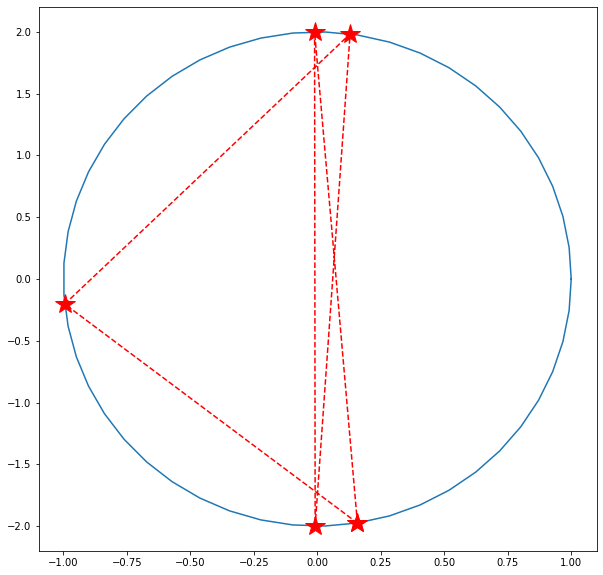

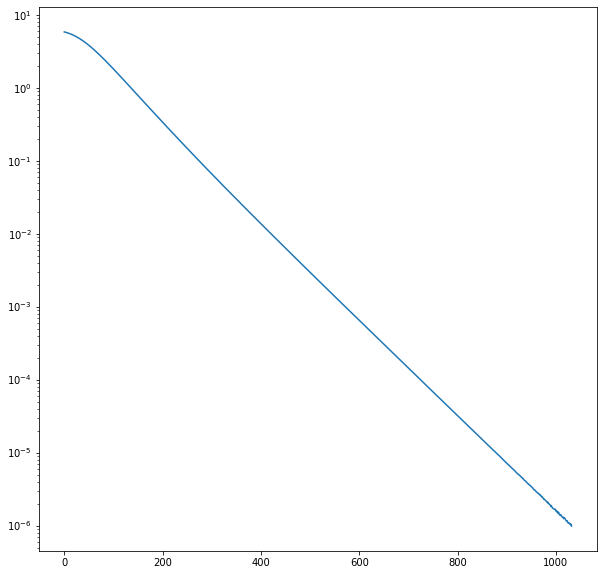

In [14]:
set_for_t = linspace(0,2*pi)

# We build the ellipse, the boundary with 
# vector of coordinates of points ellipse_x, ellipse_y 
# (points obtained by applying gamma)

ellipse_x = [gamma(t)[0] for t in set_for_t]
ellipse_y = [gamma(t)[1] for t in set_for_t]

plot(ellipse_x, ellipse_y)

# We build the trajectories x and y as vector of coordinate of points (points obtained by applying gamma)
# We add again at the end the 1st point, indeed as we said earlier we want a closed billard trajectory

trajectory_x = [gamma(t)[0] for t in vt]
trajectory_x.append(gamma(vt[0])[0])

trajectory_y = [gamma(t)[1] for t in vt]
trajectory_y.append(gamma(vt[0])[1])

plot(trajectory_x, trajectory_y, "r*--", markersize = 20)
show()

semilogy(abs(lnormg))
show()

**4 Linear model DIY**

**1** & **2**

In a linear model we have a cloud of data points from $R^n$ to $R^m$ described by the relationship $Y = \beta_0 + A X + \varepsilon$ ($\beta_0 \in R^m$ and $A \in Mat_{n \times m}$.

The purpose is to build a linear regression of the form $\tilde{Y} = \beta_0 + A X$ to fit the data points.

To do so we have the objective of minimizing the the mean squarred error of the regression :

$$\sum_1^n ||(X_i, Y_i) - (X_i, \tilde{Y_i})||$$  $$\sum_1^n ||Y_i - \tilde{Y_i}||^2 = \sum_1^n ||\varepsilon_i||^2$$

**3 & 4**

Let's first generate data in $\mathbb{R}^2$ so that we can look at the result graphically.

We do $1^{st}$ a simple regression and we compare the result estimates with gradient descent method and with OLS computation. (Remember that OLS is the best linear unbiased estimator).

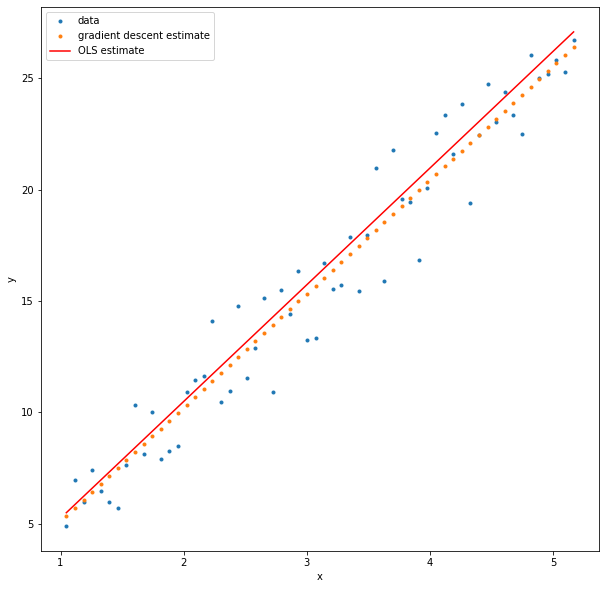

In [15]:
B = 5

x = array([i*pi/180 for i in range(60,300,4)])

y = B*x + np.random.normal(0,2,len(x))

def MSE_in_R2(B):
    return sum( (y - x*B)**2 )
        
B_estimate = methodePasFixe(MSE_in_R2, [1], 0.001, 1e-6)[-1]

OLS = cov(x,y)[0][1]/var(x)

plot(x,y,'.')
plot(x,B_estimate*x,'.')
plot(x,OLS*x,'r')

xlabel("x")
ylabel("y")
legend(("data","gradient descent estimate","OLS estimate"))

Now, let's generate data in $\mathbb{R}^n$ :

We create a sample of features of size p+1 (initially p and we add a constant term) in $\mathbb{R}^n$ and then create a target vector in $\mathbb{R}^n$.

In [16]:
n = 30
p = 3

In [17]:
X = np.concatenate((np.ones((n,1)), 2*np.random.rand(n,p)),axis=1)

Lips_cst = linalg.norm(2*np.dot(X.T,X))

In [18]:
Beta = array([[2.],[3.],[4.],[5.]])

In [19]:
eps = np.random.rand(n,1)-0.5

In [20]:
Y = np.dot(X,Beta) + eps

In [21]:
XtX = X.T.dot(X)
XtY = X.T.dot(Y)
OLS = np.linalg.inv(XtX).dot(XtY)
OLS

array([[1.71362249],
       [3.09964516],
       [4.14187462],
       [5.06249026]])

The function we want to minimize is the Mean Square Error.

We know that the Hessian of the MSE function is $2X'X$. Then assuming a 0-strongly convex function the stepsize we should use (coming from the formula $\frac{2}{L + \alpha}$) equals $\frac{2}{L}$ where L is the lipschitz constant of the gradient.

In [22]:
def MSE(B):
    return sum( (Y - X.dot(B))**2 )

In [23]:
step = 2./Lips_cst

abs(methodePasFixe(MSE, np.random.rand(Beta.shape[0],1), step, 1e-6)[-1] - OLS)

array([[1.32850514e-07],
       [4.51637945e-08],
       [4.10694252e-08],
       [9.51711598e-08]])

The error computed as the distance between the OLS result and the gradient descent one is really small. The gradient descent approche gives good results.

**5**

Now, let's redo the same thing for a real dataset found on the package sklearn from python. I choose a dataset about diabetes. Features are : age, sex, body mass index, average blood pressure, T-Cells, low-density lipoproteins, high-density lipoproteins, thyroid stimulating hormone, lamotrigine and blood sugar level. The target is a quantitative measure of disease progression one year after baseline.

In [24]:
DATA = datasets.load_diabetes()
X = DATA.data
X = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)

Lips_cst = linalg.norm(2*np.dot(X.T,X))
# as before we use a stepsize 2/L
step = 2./Lips_cst
step

Y = array([DATA.target])
Y = Y.T

XtX = X.T.dot(X)
XtY = X.T.dot(Y)
OLS = np.linalg.inv(XtX).dot(XtY)
OLS

array([[ 152.13348416],
       [ -10.01219782],
       [-239.81908937],
       [ 519.83978679],
       [ 324.39042769],
       [-792.18416163],
       [ 476.74583782],
       [ 101.04457032],
       [ 177.06417623],
       [ 751.27932109],
       [  67.62538639]])

In [28]:
def MSE(B):
    return sum( (Y - X.dot(B))**2 )

grad_result_estimate = methodePasFixe(MSE, np.random.rand(X.shape[1],1), step, 1e-6, N = 100000)[-1]
grad_result_estimate

Max number of iterations 100000


array([[ 152.13158958],
       [  -9.9392821 ],
       [-239.73731316],
       [ 520.0240959 ],
       [ 324.31845014],
       [-776.32581966],
       [ 464.16248754],
       [  93.95198591],
       [ 175.04005871],
       [ 745.37039467],
       [  67.68374458]])

In [29]:
abs(grad_result_estimate - OLS)

array([[1.89458429e-03],
       [7.29157190e-02],
       [8.17762035e-02],
       [1.84309113e-01],
       [7.19775507e-02],
       [1.58583420e+01],
       [1.25833503e+01],
       [7.09258441e+00],
       [2.02411752e+00],
       [5.90892642e+00],
       [5.83581898e-02]])

The estimates from the gradient are really close to the one from OLS explicit formula. The error computed as the distance between the OLS result and the gradient descent one is really small. The gradient descent approche gives good results.